# Practical session: Multilayer Perceptron (MLP)

A Multilayer Perceptron (MLP) is a class of feedforward artificial neural networks (ANN) that consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. It uses layers of interconnected nodes (neurons) to learn and make predictions, typically employing activation functions and backpropagation during training.

<img width="300" alt="image" src="https://miro.medium.com/v2/resize:fit:1400/1*MF1q2Q3fbpYlXX8fZUiwpA.png">

## Overview

## Dataset 

The dataset is part of a large dataset maintained at the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It is used for a diabetes study conducted on Pima Indian women aged 21 and over living in Phoenix, the fifth largest city in the state of Arizona, USA. 

The dataset consists of **768 observations** and 8 numerical independent variables. The target variable is indicated as `outcome`; `1` represents a *positive diabetes test result*, and `0` represents a *negative result*.

### Features 

- `Pregnancies`: Number of pregnancies
- `Glucose`: Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
- `BloodPressure`: Diastolic Blood Pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour Serum insulin (uh/ml)
- `BMI`: Body mass index [weight in kg/(Height in m)]
- `DiabetesPedigreeFunction`: A function that calculates the likelihood of having diabetes based on our family members.
- `Age`: Age (years)
- `Outcome`: Information about whether the individual has diabetes or not. Affected by the disease (`1`) or not (`0`)


## Data loading

In [2]:
## Importing Libraries 

# Base libraries
import numpy as np
import pandas as pd
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier

## Default options and global variables
# Set number of decimal points to float type
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.precision', 2)
SEED = 2024


In [3]:
# Set the data path 
DATA_PATH="../data/diabetes/"

# Data loading
df = pd.read_csv(DATA_PATH + "diabetes.csv", index_col=None)

# Data dimension 
print("Dataset:",df.shape[0],"rows,",  df.shape[1], "columns")

Dataset: 768 rows, 9 columns


## Quick exploration

In [4]:
# Quick exploration 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Target variable

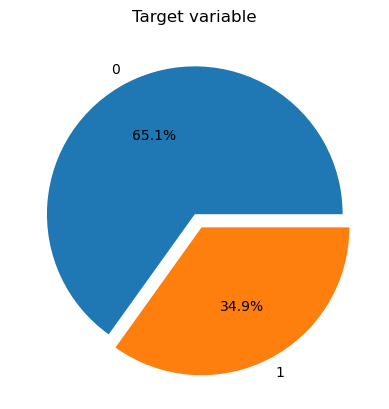

In [5]:
df['Outcome'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0,0.1]).set_title('Target variable');
plt.ylabel(None)
plt.show()

## Pre-processing

In [6]:
# input / output
X = df.loc[:,'Pregnancies':'Age']
Y = df.loc[:,'Outcome']

# Dataset split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=SEED)

print("Train: ", x_train.shape[0], "rows")
print("Test : ", x_test.shape[0], "rows")

Train:  460 rows
Test :  308 rows


In [33]:
# Check stratification
print("Dataset:\n", Y.value_counts()/len(Y))
print("Train:\n", y_train.value_counts()/len(y_train))
print("Test:\n", y_test.value_counts()/len(y_test))

Dataset:
 Outcome
0   0.65
1   0.35
Name: count, dtype: float64
Train:
 Outcome
0   0.65
1   0.35
Name: count, dtype: float64
Test:
 Outcome
0   0.66
1   0.34
Name: count, dtype: float64


## Modelling

### Model definition

`MLPClassifier` 

- `hidden_layer_sizes` : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.
- `max_iter`: Indicates the number of epochs.
- `activation`: The activation function for the hidden layers.
- `solver`: This parameter specifies the algorithm for weight optimization over the nodes.

In [7]:
EPOCHS=100
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=True, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS )

### Model fitting

In [8]:
# Training 
trained_model = model.fit(x_train, y_train)


Iteration 1, loss = 0.65627149
Iteration 2, loss = 0.63736174
Iteration 3, loss = 0.65752808
Iteration 4, loss = 0.64836338
Iteration 5, loss = 0.64881691
Iteration 6, loss = 0.64722462
Iteration 7, loss = 0.64651123
Iteration 8, loss = 0.64713039
Iteration 9, loss = 0.64651809
Iteration 10, loss = 0.64619225
Iteration 11, loss = 0.64335868
Iteration 12, loss = 0.64145287
Iteration 13, loss = 0.64297983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


### Model evaluation

In [9]:
## Evaluation
accuracy = trained_model.score(x_test, y_test)
print("Accuracy: ", accuracy )

Accuracy:  0.6558441558441559


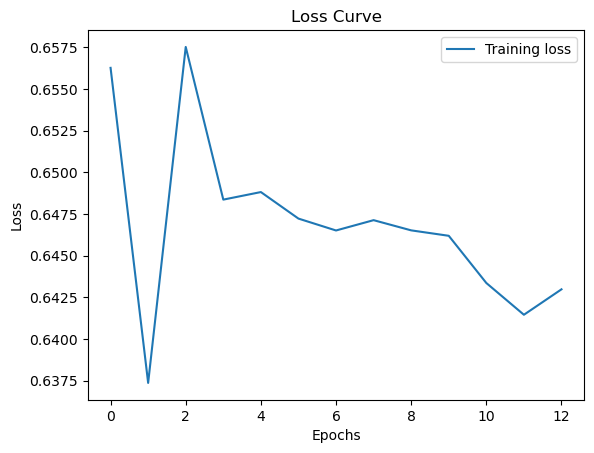

In [10]:
# Loss curve
def plot_loss_curve(model):
    plt.plot(model.loss_curve_, label='Training loss')
    if model.validation_scores_ != None:
        plt.plot(model.validation_scores_, label='Validation loss')
    plt.title("Loss Curve")
    plt.xlabel('Epochs')
    plt.legend()
    plt.ylabel('Loss')

plot_loss_curve(trained_model)

## Model improvements 

### Increase the learning rate

- `learning_rate_init`: 0.1 --> 1.0

In [11]:
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=False, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=1.0,
                    max_iter=EPOCHS )
# Training 
trained_model = model.fit(x_train, y_train)
## Evaluation
accuracy = trained_model.score(x_test, y_test)
print("Accuracy: ", accuracy )

Accuracy:  0.6558441558441559


### Increase hidden layers

From one hidden layer with 6 nodes to two hidden layers both with 6 nodes each. 

- `hidden_layer_sizes`: (6,) --> (6,6) 

In [17]:
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,6),
                    random_state=SEED,
                    verbose=False, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS )
# Training 
trained_model = model.fit(x_train, y_train)
## Evaluation
accuracy = trained_model.score(x_test, y_test)
print("Accuracy: ", accuracy )

Accuracy:  0.6428571428571429


### Scaling inputs

By normalizing or scaling inputs, neural networks can learn more efficiently, converge faster, and ultimately perform better on a wide range of tasks.

- **Faster Convergence**: Scaling input data helps the optimization algorithm converge more quickly. Neural networks use gradient-based optimization methods, and having inputs within a similar scale prevents some weights from updating significantly faster than others. This imbalance can slow down convergence or prevent the model from converging at all.
- **Numerical Stability**: Large input values might lead to very large intermediate values in the network layers, causing numerical instability (like exploding gradients) during training. Scaling inputs mitigates this issue and helps maintain numerical stability throughout the network.
- **Regularization and Optimization**: Scaling helps in preventing certain features from dominating solely due to their larger scale, ensuring that the model learns meaningful representations from all features equally. This aids in better generalization and prevents overfitting.
- **Improves Learning Dynamics**: With proper scaling, the optimization landscape becomes smoother, allowing the gradient descent algorithms to progress more directly towards the optimal solution.
- **Network Weights**: Weight initialization and learning rate can be affected by the scale of input features. Properly scaled inputs often lead to more effective weight initialization strategies and learning rates, which contribute to better model training.

In [18]:
sc = StandardScaler()
scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Accuracy:  0.7824675324675324


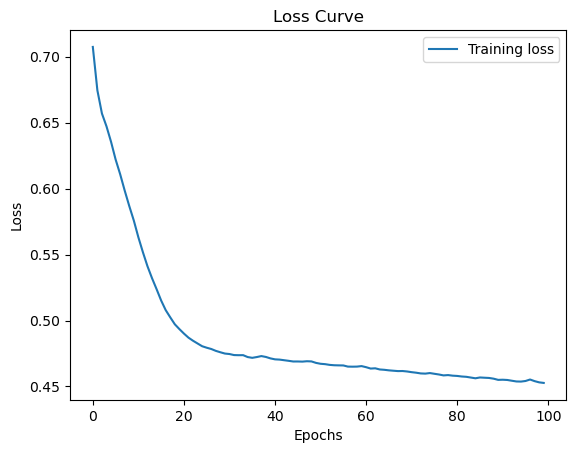

In [19]:
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=False, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS )

# Training 
trained_model = model.fit(x_train_scaled, y_train)
## Evaluation
accuracy = trained_model.score(x_test_scaled, y_test)
print("Accuracy: ", accuracy )
plot_loss_curve(trained_model)

In [41]:
## Helper functions

def print_performance_metrics(y_test, y_pred):
    # metrics info: https://scikit-learn.org/stable/modules/model_evaluation.html
    accuracy = metrics.accuracy_score(y_test, y_pred)
    baccuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
        
    print("Accuracy Score: \t", accuracy, "\nBalanced Accuracy Score:", baccuracy)
    print("Precision Score: \t", precision, "\nRecall Score: \t\t", recall, "\nF1 Score: \t\t", f1score)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
    disp.plot()
    plt.show()

    
def plot_curves(model, x_test, y_test):
    try:
        display1 = metrics.RocCurveDisplay.from_estimator(model, x_test, y_test)
        display1.ax_.set_title("ROC curve")

        display2 = metrics.PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
        display2.ax_.set_title("Precision-Recall curve")
    except:
      print("Error")

### Adding validation set

Accuracy:  0.775974025974026
Accuracy Score: 	 0.775974025974026 
Balanced Accuracy Score: 0.7305716420698674
Precision Score: 	 0.7126436781609196 
Recall Score: 		 0.5849056603773585 
F1 Score: 		 0.6424870466321244


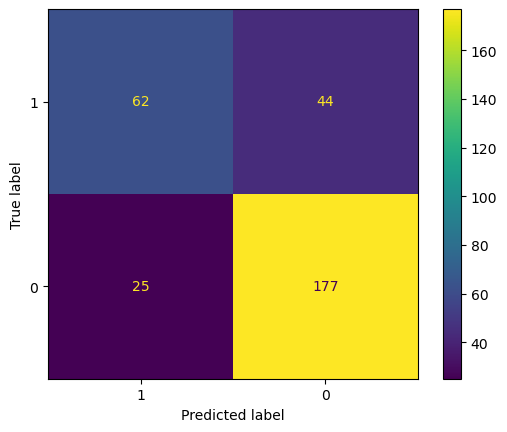

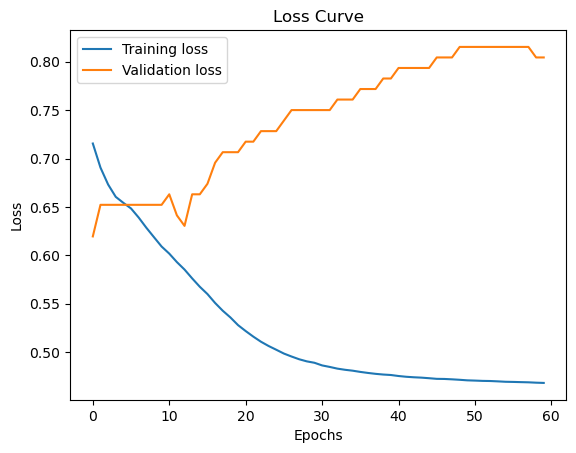

In [42]:
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=False, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS,
                    validation_fraction=0.2, early_stopping=True )

# Training 
trained_model = model.fit(x_train_scaled, y_train)
## Evaluation
accuracy = trained_model.score(x_test_scaled, y_test)
print("Accuracy: ", accuracy )

y_pred = trained_model.predict(x_test_scaled)
print_performance_metrics(y_test, y_pred)
plot_loss_curve(trained_model)


### Extras

Accuracy:  0.775974025974026
Accuracy Score: 	 0.775974025974026 
Balanced Accuracy Score: 0.7305716420698674
Precision Score: 	 0.7126436781609196 
Recall Score: 		 0.5849056603773585 
F1 Score: 		 0.6424870466321244


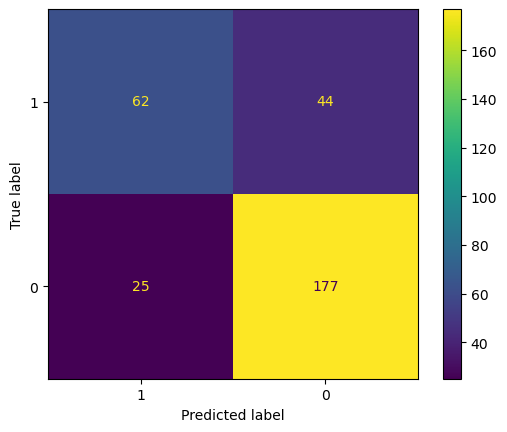

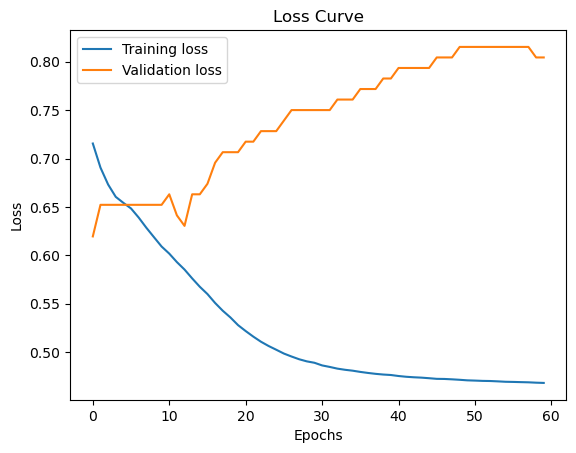

In [88]:
##  Define a model 
model = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=SEED,
                    verbose=False, 
                    solver='sgd' ,
                    activation='logistic',
                    learning_rate_init=0.1,
                    max_iter=EPOCHS,
                    validation_fraction=0.2, early_stopping=True )

# Training 
trained_model = model.fit(x_train_scaled, y_train)
## Evaluation
accuracy = trained_model.score(x_test_scaled, y_test)
print("Accuracy: ", accuracy )

y_pred = trained_model.predict(x_test_scaled)
print_performance_metrics(y_test, y_pred)
plot_loss_curve(trained_model)